In [1]:
%load_ext sql

In [2]:
import numpy as np
import pandas as pd

import plotly as py
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import scikitplot as skplt

# Load Data

In [3]:
products_df = pd.read_csv('PRODUCTS_TAKEHOME.csv')
tran_df = pd.read_csv('TRANSACTION_TAKEHOME.csv')
user_df = pd.read_csv('USER_TAKEHOME.csv')

# Data Exploration

In [4]:
products_df.head()

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11


In [5]:
tran_df.head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,


In [6]:
user_df.head()

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female


In [7]:
# load info for each dataset
datasets = {'user': user_df, 'tran': tran_df, 'products': products_df}
for name, df in datasets.items():
    print(f'\n{name}_df info:')
    df.info()


user_df info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            100000 non-null  object
 1   CREATED_DATE  100000 non-null  object
 2   BIRTH_DATE    96325 non-null   object
 3   STATE         95188 non-null   object
 4   LANGUAGE      69492 non-null   object
 5   GENDER        94108 non-null   object
dtypes: object(6)
memory usage: 4.6+ MB

tran_df info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RECEIPT_ID      50000 non-null  object 
 1   PURCHASE_DATE   50000 non-null  object 
 2   SCAN_DATE       50000 non-null  object 
 3   STORE_NAME      50000 non-null  object 
 4   USER_ID         50000 non-null  object 
 5   BARCODE         44238 non-null  float64
 6   FINA

# 1. Check for data quality issues

### Missing Values

In [8]:
# missing values for all datasets
missing_values_user = user_df.isnull().sum()
missing_values_tran = tran_df.isnull().sum()
missing_values_products = products_df.isnull().sum()

missing_values_user, missing_values_tran, missing_values_products

(ID                  0
 CREATED_DATE        0
 BIRTH_DATE       3675
 STATE            4812
 LANGUAGE        30508
 GENDER           5892
 dtype: int64,
 RECEIPT_ID           0
 PURCHASE_DATE        0
 SCAN_DATE            0
 STORE_NAME           0
 USER_ID              0
 BARCODE           5762
 FINAL_QUANTITY       0
 FINAL_SALE           0
 dtype: int64,
 CATEGORY_1         111
 CATEGORY_2        1424
 CATEGORY_3       60566
 CATEGORY_4      778093
 MANUFACTURER    226474
 BRAND           226472
 BARCODE           4025
 dtype: int64)

In [9]:
# fraction of missing values for each dataset
datasets = {'user': user_df, 'tran': tran_df, 'products': products_df}
missing_fractions = {name: df.isnull().mean() * 100 for name, df in datasets.items()}

# show in percentages for each dataset
for dataset_name, missing_fraction in missing_fractions.items():
    print(f'\nMissing values in {dataset_name}_df:')
    for col, value in missing_fraction.items():
        if value > 0:
            print(f'  {col}: {value:.2f}%')



Missing values in user_df:
  BIRTH_DATE: 3.67%
  STATE: 4.81%
  LANGUAGE: 30.51%
  GENDER: 5.89%

Missing values in tran_df:
  BARCODE: 11.52%

Missing values in products_df:
  CATEGORY_1: 0.01%
  CATEGORY_2: 0.17%
  CATEGORY_3: 7.16%
  CATEGORY_4: 92.02%
  MANUFACTURER: 26.78%
  BRAND: 26.78%
  BARCODE: 0.48%


In [10]:
tran_df.FINAL_SALE.value_counts()

,count
FINAL_SALE,
,12500
1.25,1323
1.00,744
2.99,588
1.99,586
...,...
16.47,1
10.92,1
61.30,1


In [11]:
print(tran_df['FINAL_SALE'].unique())

[' ' '1.49' '3.49' ... '11.02' '20.17' '42.38']


**Missing Data**

A considerable fraction of values (more than 30%) are missing in below datasets:
- User: `LANGUAGE`
- Products: `CATEGORY 4`, `MANUFACTURER`, and `BRAND`
- Transactions: `BARCODE`; `TOTAL_SALE` is stored as a blank space instead of null value

### Duplicates

In [12]:
# duplicates for all datasets
duplicates_user = user_df.duplicated().sum()
duplicates_tran = tran_df.duplicated().sum()
duplicates_products = products_df.duplicated().sum()

duplicates_user, duplicates_tran, duplicates_products

(0, 171, 215)

**Duplicate Values**
- Transaction: 171 records
- Products: 215 records

In [13]:
tran_df['FINAL_QUANTITY'].value_counts()

,count
FINAL_QUANTITY,
1.00,35698
zero,12500
2.00,1285
3.00,184
4.00,139
...,...
6.22,1
1.22,1
1.23,1


In [14]:
tran_df['FINAL_SALE'].value_counts()

,count
FINAL_SALE,
,12500
1.25,1323
1.00,744
2.99,588
1.99,586
...,...
16.47,1
10.92,1
61.30,1


In [15]:
tran_df.sort_values(by=['RECEIPT_ID', 'BARCODE']).head(10)

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
41567,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,1.54
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
39291,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,1.00,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,
25928,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,2.54
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
41475,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,1.00,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,
43233,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,5.29


**▼ Since the transaction data is messy and seems inconsistent in quantity and sales. Let's check the different cases in `FINAL_QUANITY` and `FINAL_SALE` under the same `RECEIPT_ID` and `BARCODE`.**

In [16]:
# Group by RECEIPT_ID and BARCODE and count unique values in FINAL_QUANTITY and FINAL_SALE
receipt_barcode_counts = tran_df.groupby(['RECEIPT_ID', 'BARCODE']).agg({'FINAL_QUANTITY': 'nunique', 'FINAL_SALE': 'nunique'}).reset_index()
receipt_barcode_counts

,RECEIPT_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,1.530001e+10,1,2
1,00017e0a-7851-42fb-bfab-0baa96e23586,7.874223e+10,1,2
2,000239aa-3478-453d-801e-66a82e39c8af,7.833997e+11,2,1
3,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,4.790050e+10,1,2
4,0002d8cd-1701-4cdd-a524-b70402e2dbc0,6.811314e+11,2,1
...,...,...,...,...
21974,fff60bb7-bf93-4e6b-8055-4d7688da7ead,7.874221e+10,2,1
21975,fff6c6c8-e002-4262-85ea-25849d9721db,7.874237e+10,1,2
21976,fffbb112-3cc5-47c2-b014-08db2f87e0c7,8.180000e+11,2,1
21977,fffbfb2a-7c1f-41c9-a5da-628fa7fcc746,1.300001e+10,1,2


In [17]:
receipt_barcode_counts['FINAL_QUANTITY'].value_counts()

,count
FINAL_QUANTITY,
2,11064
1,10913
3,2


In [18]:
receipt_barcode_counts['FINAL_SALE'].value_counts()

,count
FINAL_SALE,
2,11017
1,10948
3,12
4,2


In [19]:
# the dataframe of different combinations of final_quantity and final sale
receipt_barcode_counts.groupby(by=['FINAL_QUANTITY', 'FINAL_SALE']).size().reset_index(name='count')

,FINAL_QUANTITY,FINAL_SALE,count
0,1,2,10913
1,2,1,10948
2,2,2,103
3,2,3,11
4,2,4,2
5,3,2,1
6,3,3,1


▲ Different combinations are showed above. Let's break it down and clean it accordingly.

In [20]:
# check each case from the very bottom
# 6. starting from quantity 3, sales 3
receipt_barcode_counts[(receipt_barcode_counts['FINAL_QUANTITY'] == 3) & (receipt_barcode_counts['FINAL_SALE'] == 3)]

,RECEIPT_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
15608,b5cee7c6-838f-4208-9866-24d56771cbf9,7.096900e+10,3,3


In [21]:
tran_df[tran_df['RECEIPT_ID']=='b5cee7c6-838f-4208-9866-24d56771cbf9']

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
17764,b5cee7c6-838f-4208-9866-24d56771cbf9,2024-09-08,2024-09-08 12:41:29.264 Z,PRICE CUTTER,5efdff6515d4c51485711d44,7.096900e+10,1.00,
17765,b5cee7c6-838f-4208-9866-24d56771cbf9,2024-09-08,2024-09-08 12:41:29.264 Z,PRICE CUTTER,5efdff6515d4c51485711d44,7.096900e+10,zero,5.27
36440,b5cee7c6-838f-4208-9866-24d56771cbf9,2024-09-08,2024-09-08 12:41:29.264 Z,PRICE CUTTER,5efdff6515d4c51485711d44,7.096900e+10,1.07,5.27
36441,b5cee7c6-838f-4208-9866-24d56771cbf9,2024-09-08,2024-09-08 12:41:29.264 Z,PRICE CUTTER,5efdff6515d4c51485711d44,7.096900e+10,1.00,3.19


▲ The above record does not exhibit a clear pattern, as the quantity and sales values appear inconsistent. This irregularity suggests a potential system error; this record will be removed.

In [22]:
# 5
receipt_barcode_counts[(receipt_barcode_counts['FINAL_QUANTITY'] == 3) & (receipt_barcode_counts['FINAL_SALE'] == 2)]

,RECEIPT_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
8356,61dc6179-7ae7-4acd-b043-8ba796bc5949,4.900006e+10,3,2


In [23]:
tran_df[tran_df['RECEIPT_ID']=='61dc6179-7ae7-4acd-b043-8ba796bc5949']

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
9504,61dc6179-7ae7-4acd-b043-8ba796bc5949,2024-09-08,2024-09-08 13:30:53.944 Z,WALMART,63379ef227ef842ac62b6e42,4.900006e+10,1.00,
9505,61dc6179-7ae7-4acd-b043-8ba796bc5949,2024-09-08,2024-09-08 13:30:53.944 Z,WALMART,63379ef227ef842ac62b6e42,4.900006e+10,zero,0.94
9506,61dc6179-7ae7-4acd-b043-8ba796bc5949,2024-09-08,2024-09-08 13:30:53.944 Z,WALMART,63379ef227ef842ac62b6e42,4.900006e+10,1.00,
9507,61dc6179-7ae7-4acd-b043-8ba796bc5949,2024-09-08,2024-09-08 13:30:53.944 Z,WALMART,63379ef227ef842ac62b6e42,4.900006e+10,zero,0.94
48464,61dc6179-7ae7-4acd-b043-8ba796bc5949,2024-09-08,2024-09-08 13:30:53.944 Z,WALMART,63379ef227ef842ac62b6e42,4.900006e+10,1.00,0.94
48465,61dc6179-7ae7-4acd-b043-8ba796bc5949,2024-09-08,2024-09-08 13:30:53.944 Z,WALMART,63379ef227ef842ac62b6e42,4.900006e+10,1.00,0.94
48466,61dc6179-7ae7-4acd-b043-8ba796bc5949,2024-09-08,2024-09-08 13:30:53.944 Z,WALMART,63379ef227ef842ac62b6e42,4.900006e+10,1.00,0.94
48467,61dc6179-7ae7-4acd-b043-8ba796bc5949,2024-09-08,2024-09-08 13:30:53.944 Z,WALMART,63379ef227ef842ac62b6e42,4.900006e+10,3.00,0.94


▲ The above record seems to have a bulk purchase, but the `FINAL_SALE` did not adjust accordingly. For better calculation, we can remove the last one and keep the above multiple entries, counting as multiple items being scanned.

In [24]:
index_to_remove = 48467

# drop the specific record by index
tran_df = tran_df.drop(index_to_remove)

# verify the record is removed
tran_df[tran_df['RECEIPT_ID'] == '61dc6179-7ae7-4acd-b043-8ba796bc5949']

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
9504,61dc6179-7ae7-4acd-b043-8ba796bc5949,2024-09-08,2024-09-08 13:30:53.944 Z,WALMART,63379ef227ef842ac62b6e42,4.900006e+10,1.00,
9505,61dc6179-7ae7-4acd-b043-8ba796bc5949,2024-09-08,2024-09-08 13:30:53.944 Z,WALMART,63379ef227ef842ac62b6e42,4.900006e+10,zero,0.94
9506,61dc6179-7ae7-4acd-b043-8ba796bc5949,2024-09-08,2024-09-08 13:30:53.944 Z,WALMART,63379ef227ef842ac62b6e42,4.900006e+10,1.00,
9507,61dc6179-7ae7-4acd-b043-8ba796bc5949,2024-09-08,2024-09-08 13:30:53.944 Z,WALMART,63379ef227ef842ac62b6e42,4.900006e+10,zero,0.94
48464,61dc6179-7ae7-4acd-b043-8ba796bc5949,2024-09-08,2024-09-08 13:30:53.944 Z,WALMART,63379ef227ef842ac62b6e42,4.900006e+10,1.00,0.94
48465,61dc6179-7ae7-4acd-b043-8ba796bc5949,2024-09-08,2024-09-08 13:30:53.944 Z,WALMART,63379ef227ef842ac62b6e42,4.900006e+10,1.00,0.94
48466,61dc6179-7ae7-4acd-b043-8ba796bc5949,2024-09-08,2024-09-08 13:30:53.944 Z,WALMART,63379ef227ef842ac62b6e42,4.900006e+10,1.00,0.94


In [25]:
# 4
receipt_barcode_counts[(receipt_barcode_counts['FINAL_QUANTITY'] == 2) & (receipt_barcode_counts['FINAL_SALE'] == 4)]

,RECEIPT_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
3700,2acd7e8d-37df-4e51-8ee5-9a9c8c1d9711,2.400005e+10,2,4
5779,431fe612-ed55-470e-939c-043ad31f33f3,1.200050e+10,2,4


In [26]:
tran_df[tran_df['RECEIPT_ID']=='2acd7e8d-37df-4e51-8ee5-9a9c8c1d9711']

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
4190,2acd7e8d-37df-4e51-8ee5-9a9c8c1d9711,2024-09-08,2024-09-08 11:13:01.935 Z,WALMART,663140f9b7b24d45d938f3be,2.400005e+10,1.00,
4191,2acd7e8d-37df-4e51-8ee5-9a9c8c1d9711,2024-09-08,2024-09-08 11:13:01.935 Z,WALMART,663140f9b7b24d45d938f3be,2.400005e+10,zero,1.36
4192,2acd7e8d-37df-4e51-8ee5-9a9c8c1d9711,2024-09-08,2024-09-08 11:13:01.935 Z,WALMART,663140f9b7b24d45d938f3be,2.400005e+10,1.00,
4193,2acd7e8d-37df-4e51-8ee5-9a9c8c1d9711,2024-09-08,2024-09-08 11:13:01.935 Z,WALMART,663140f9b7b24d45d938f3be,2.400005e+10,zero,1.48
35457,2acd7e8d-37df-4e51-8ee5-9a9c8c1d9711,2024-09-08,2024-09-08 11:13:01.935 Z,WALMART,663140f9b7b24d45d938f3be,2.400005e+10,1.00,1.48
35458,2acd7e8d-37df-4e51-8ee5-9a9c8c1d9711,2024-09-08,2024-09-08 11:13:01.935 Z,WALMART,663140f9b7b24d45d938f3be,2.400005e+10,1.00,1.48
35459,2acd7e8d-37df-4e51-8ee5-9a9c8c1d9711,2024-09-08,2024-09-08 11:13:01.935 Z,WALMART,663140f9b7b24d45d938f3be,2.400005e+10,1.00,1.36
35460,2acd7e8d-37df-4e51-8ee5-9a9c8c1d9711,2024-09-08,2024-09-08 11:13:01.935 Z,WALMART,663140f9b7b24d45d938f3be,2.400005e+10,1.00,2.28


In [27]:
tran_df[tran_df['RECEIPT_ID']=='431fe612-ed55-470e-939c-043ad31f33f3']

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
6570,431fe612-ed55-470e-939c-043ad31f33f3,2024-09-07,2024-09-07 16:39:01.409 Z,DOLLAR GENERAL STORE,5e038cebcb322c11de193bb7,1.200050e+10,1.00,
6571,431fe612-ed55-470e-939c-043ad31f33f3,2024-09-07,2024-09-07 16:39:01.409 Z,DOLLAR GENERAL STORE,5e038cebcb322c11de193bb7,1.200050e+10,zero,5.25
6572,431fe612-ed55-470e-939c-043ad31f33f3,2024-09-07,2024-09-07 16:39:01.409 Z,DOLLAR GENERAL STORE,5e038cebcb322c11de193bb7,1.200050e+10,1.00,
43005,431fe612-ed55-470e-939c-043ad31f33f3,2024-09-07,2024-09-07 16:39:01.409 Z,DOLLAR GENERAL STORE,5e038cebcb322c11de193bb7,1.200050e+10,1.00,6.25
43006,431fe612-ed55-470e-939c-043ad31f33f3,2024-09-07,2024-09-07 16:39:01.409 Z,DOLLAR GENERAL STORE,5e038cebcb322c11de193bb7,1.200050e+10,1.00,5.25
43007,431fe612-ed55-470e-939c-043ad31f33f3,2024-09-07,2024-09-07 16:39:01.409 Z,DOLLAR GENERAL STORE,5e038cebcb322c11de193bb7,1.200050e+10,1.00,5.26


In [28]:
# 3
receipt_barcode_counts[(receipt_barcode_counts['FINAL_QUANTITY'] == 2) & (receipt_barcode_counts['FINAL_SALE'] == 3)]

,RECEIPT_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
2237,19f725b1-e708-4060-b159-acc7674e5405,3.111119e+11,2,3
4345,32a7b39c-eade-4e4c-88d5-caaaf285ead5,5.005131e+10,2,3
4507,34bc2668-b3b6-494a-a6bc-e4a198bda1a0,2.004230e+11,2,3
7338,5601b44e-581f-43ee-b1f7-32af6976eab4,3.600001e+10,2,3
8942,682cb059-74a1-4c47-abd8-5fd6541d88bf,2.840059e+10,2,3
12424,90c9be9a-63a1-4884-a80c-3628c4c150df,5.150001e+10,2,3
13384,9b74baa2-de03-47b1-bf96-6fbdf3a6dc19,8.297930e+11,2,3
15257,b17d5a59-c613-4265-a0ea-8d5b7714370d,3.128435e+11,2,3
16015,ba9063e1-f8da-4673-93cf-629905a943a6,4.133104e+10,2,3
18613,d92948ea-e1a4-426e-ae07-68b7607deef4,3.119171e+11,2,3


In [29]:
tran_df[tran_df['RECEIPT_ID']=='19f725b1-e708-4060-b159-acc7674e5405']

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
2504,19f725b1-e708-4060-b159-acc7674e5405,2024-08-23,2024-09-03 09:47:23.950 Z,SHOP RITE,619c29ca06570b5913a151fb,3.111119e+11,1.00,
2505,19f725b1-e708-4060-b159-acc7674e5405,2024-08-23,2024-09-03 09:47:23.950 Z,SHOP RITE,619c29ca06570b5913a151fb,3.111119e+11,zero,3.96
31668,19f725b1-e708-4060-b159-acc7674e5405,2024-08-23,2024-09-03 09:47:23.950 Z,SHOP RITE,619c29ca06570b5913a151fb,3.111119e+11,1.00,2.99
31675,19f725b1-e708-4060-b159-acc7674e5405,2024-08-23,2024-09-03 09:47:23.950 Z,SHOP RITE,619c29ca06570b5913a151fb,3.111119e+11,1.00,3.96


In [30]:
tran_df[tran_df['RECEIPT_ID']=='682cb059-74a1-4c47-abd8-5fd6541d88bf']

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
10163,682cb059-74a1-4c47-abd8-5fd6541d88bf,2024-09-07,2024-09-07 15:47:48.122 Z,WALMART,61ac11e6e9b3d75037b5808a,1.200000e+10,zero,11.70
10164,682cb059-74a1-4c47-abd8-5fd6541d88bf,2024-09-07,2024-09-07 15:47:48.122 Z,WALMART,61ac11e6e9b3d75037b5808a,2.840059e+10,1.00,
10165,682cb059-74a1-4c47-abd8-5fd6541d88bf,2024-09-07,2024-09-07 15:47:48.122 Z,WALMART,61ac11e6e9b3d75037b5808a,2.840059e+10,zero,1.36
34862,682cb059-74a1-4c47-abd8-5fd6541d88bf,2024-09-07,2024-09-07 15:47:48.122 Z,WALMART,61ac11e6e9b3d75037b5808a,1.200000e+10,1.00,11.70
46868,682cb059-74a1-4c47-abd8-5fd6541d88bf,2024-09-07,2024-09-07 15:47:48.122 Z,WALMART,61ac11e6e9b3d75037b5808a,2.840059e+10,1.00,1.36
46869,682cb059-74a1-4c47-abd8-5fd6541d88bf,2024-09-07,2024-09-07 15:47:48.122 Z,WALMART,61ac11e6e9b3d75037b5808a,2.840059e+10,1.00,4.48


In [31]:
# 2
receipt_barcode_counts[(receipt_barcode_counts['FINAL_QUANTITY'] == 2) & (receipt_barcode_counts['FINAL_SALE'] == 2)]

,RECEIPT_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
37,007d3232-3990-497f-a081-549e9e7a478b,7.920006e+10,2,2
139,01a70fe0-026f-4bea-9da4-7d13bbf21e9a,4.178900e+10,2,2
208,0273cbd8-1620-46c9-8e99-6971e850a2fc,6.811311e+11,2,2
638,0764c668-2863-49e3-8914-52772620b05d,2.620014e+10,2,2
1458,1108704b-5210-4dce-8763-ed01729695aa,5.040074e+10,2,2
...,...,...,...,...
20146,eb8b58c3-182a-4623-8492-0b8231b85135,8.881090e+11,2,2
20436,eee21773-6946-474a-9978-fe0659140973,4.178027e+10,2,2
20754,f21e3db2-a257-46b3-886c-93accd8b7ed0,6.414415e+10,2,2
21238,f79e00be-fbc1-4a27-b68c-a5f406c9a5e0,1.120601e+10,2,2


In [32]:
tran_df[tran_df['RECEIPT_ID']=='01a70fe0-026f-4bea-9da4-7d13bbf21e9a']

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
162,01a70fe0-026f-4bea-9da4-7d13bbf21e9a,2024-09-02,2024-09-07 16:02:39.835 Z,WALMART,614e733372ba844aa8dc345e,4.178900e+10,1.00,
163,01a70fe0-026f-4bea-9da4-7d13bbf21e9a,2024-09-02,2024-09-07 16:02:39.835 Z,WALMART,614e733372ba844aa8dc345e,4.178900e+10,zero,0.52
49758,01a70fe0-026f-4bea-9da4-7d13bbf21e9a,2024-09-02,2024-09-07 16:02:39.835 Z,WALMART,614e733372ba844aa8dc345e,4.178900e+10,1.00,0.52
49759,01a70fe0-026f-4bea-9da4-7d13bbf21e9a,2024-09-02,2024-09-07 16:02:39.835 Z,WALMART,614e733372ba844aa8dc345e,4.178900e+10,1.00,0.52


In [33]:
tran_df[tran_df['RECEIPT_ID']=='fb825ba4-fe3b-45b4-a547-5a33d23e5e33']

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
24561,fb825ba4-fe3b-45b4-a547-5a33d23e5e33,2024-08-24,2024-08-25 13:58:08.848 Z,WALMART,61ed4fda0605d0323d86dced,7.874223e+10,zero,0.78
24562,fb825ba4-fe3b-45b4-a547-5a33d23e5e33,2024-08-24,2024-08-25 13:58:08.848 Z,WALMART,61ed4fda0605d0323d86dced,7.874223e+10,1.00,
28833,fb825ba4-fe3b-45b4-a547-5a33d23e5e33,2024-08-24,2024-08-25 13:58:08.848 Z,WALMART,61ed4fda0605d0323d86dced,7.874223e+10,1.00,0.78
46640,fb825ba4-fe3b-45b4-a547-5a33d23e5e33,2024-08-24,2024-08-25 13:58:08.848 Z,WALMART,61ed4fda0605d0323d86dced,7.874223e+10,1.00,0.78


In [34]:
tran_df[tran_df['RECEIPT_ID']=='eee21773-6946-474a-9978-fe0659140973']

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
23265,eee21773-6946-474a-9978-fe0659140973,2024-07-26,2024-07-29 20:40:25.073 Z,PUBLIX,60cff0e7e265b446d62200b2,4.178027e+10,zero,4.79
23266,eee21773-6946-474a-9978-fe0659140973,2024-07-26,2024-07-29 20:40:25.073 Z,PUBLIX,60cff0e7e265b446d62200b2,4.178027e+10,1.00,
29955,eee21773-6946-474a-9978-fe0659140973,2024-07-26,2024-07-29 20:40:25.073 Z,PUBLIX,60cff0e7e265b446d62200b2,4.178027e+10,1.00,4.79
49660,eee21773-6946-474a-9978-fe0659140973,2024-07-26,2024-07-29 20:40:25.073 Z,PUBLIX,60cff0e7e265b446d62200b2,4.178027e+10,1.00,4.79


▲ The above records exhibit repeated entries for the same receipt ID and barcode, indicating potential duplicate logging or multiple attempts to process the same transaction. The FINAL_QUANTITY values fluctuate between zero and 1.00, and the FINAL_SALE values either remain constant or fluctuates. For this use case, the duplicate entries might indicate the number of the item the customer bought, and the sale price fluctuates might because discount occurs when purchasing more.

In [35]:
# 1
receipt_barcode_counts[(receipt_barcode_counts['FINAL_QUANTITY'] == 2) & (receipt_barcode_counts['FINAL_SALE'] == 1)]

,RECEIPT_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
2,000239aa-3478-453d-801e-66a82e39c8af,7.833997e+11,2,1
4,0002d8cd-1701-4cdd-a524-b70402e2dbc0,6.811314e+11,2,1
6,00096c49-8b04-42f9-88ce-941c5e06c4a7,7.830007e+10,2,1
9,0019ec79-cbb3-41ed-b84c-cd74d04553f8,5.150025e+10,2,1
11,001f2f3f-1746-4217-a98f-73c63c63bae2,4.600029e+10,2,1
...,...,...,...,...
21970,ffebda11-ff18-46e0-8455-cef0679558cc,7.940059e+10,2,1
21972,ffef10cb-52ac-4123-aa87-0d65e85b6ef7,7.940045e+10,2,1
21974,fff60bb7-bf93-4e6b-8055-4d7688da7ead,7.874221e+10,2,1
21976,fffbb112-3cc5-47c2-b014-08db2f87e0c7,8.180000e+11,2,1


In [36]:
tran_df[tran_df['RECEIPT_ID']=='0002d8cd-1701-4cdd-a524-b70402e2dbc0']

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
5,0002d8cd-1701-4cdd-a524-b70402e2dbc0,2024-06-24,2024-06-24 19:44:54.247 Z,WALMART,5dcc6c510040a012b8e76924,6.811314e+11,zero,1.46
40388,0002d8cd-1701-4cdd-a524-b70402e2dbc0,2024-06-24,2024-06-24 19:44:54.247 Z,WALMART,5dcc6c510040a012b8e76924,6.811314e+11,1.00,1.46


In [37]:
tran_df[tran_df['RECEIPT_ID']=='ffebda11-ff18-46e0-8455-cef0679558cc']

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
24991,ffebda11-ff18-46e0-8455-cef0679558cc,2024-08-03,2024-08-13 18:36:52.294 Z,DOLLAR GENERAL STORE,65935f6499b40f103b64fc0c,7.940059e+10,zero,4.25
26063,ffebda11-ff18-46e0-8455-cef0679558cc,2024-08-03,2024-08-13 18:36:52.294 Z,DOLLAR GENERAL STORE,65935f6499b40f103b64fc0c,7.940059e+10,1.00,4.25


▲ This pattern suggests a potential system error or an incorrect transaction logging process, where an item may have been scanned multiple times but not properly aggregated. **It could also be a "Buy 1 Get 1 Free" discount.** Given that the sale amount remains consistent, it is likely that these entries represent a single purchase rather than multiple transactions. For this use case, **consolidating these records into a single entry** by retaining the FINAL_SALE value and setting FINAL_QUANTITY to 1 ensures data accuracy and prevents transaction duplication.

In [38]:
# 0
receipt_barcode_counts[(receipt_barcode_counts['FINAL_QUANTITY'] == 1) & (receipt_barcode_counts['FINAL_SALE'] == 2)]

,RECEIPT_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,1.530001e+10,1,2
1,00017e0a-7851-42fb-bfab-0baa96e23586,7.874223e+10,1,2
3,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,4.790050e+10,1,2
5,000550b2-1480-4c07-950f-ff601f242152,4.920091e+10,1,2
7,000e1d35-15e5-46c6-b6b3-33653ed3d27e,5.200001e+10,1,2
...,...,...,...,...
21969,ffeb1ff4-0db9-4cb9-9574-20ec2db3e5ad,2.484283e+10,1,2
21971,ffec42ba-c71d-44da-b8d0-eb529632e87a,4.119601e+10,1,2
21973,fff15a3d-25ea-4c36-b84a-91eb4157daf9,7.874213e+10,1,2
21975,fff6c6c8-e002-4262-85ea-25849d9721db,7.874237e+10,1,2


In [39]:
tran_df[tran_df['RECEIPT_ID']=='0000d256-4041-4a3e-adc4-5623fb6e0c99']

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
41567,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,1.54


In [40]:
tran_df[tran_df['RECEIPT_ID']=='ffec42ba-c71d-44da-b8d0-eb529632e87a']

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
24992,ffec42ba-c71d-44da-b8d0-eb529632e87a,2024-06-17,2024-06-17 11:17:21.971 Z,WINCO FOODS,6632c5871be3d689ceb875c7,4.119601e+10,1.00,
44205,ffec42ba-c71d-44da-b8d0-eb529632e87a,2024-06-17,2024-06-17 11:17:21.971 Z,WINCO FOODS,6632c5871be3d689ceb875c7,4.119601e+10,1.00,2.18


In [41]:
tran_df[tran_df['RECEIPT_ID']=='fffbfb2a-7c1f-41c9-a5da-628fa7fcc746']

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
24998,fffbfb2a-7c1f-41c9-a5da-628fa7fcc746,2024-07-28,2024-07-28 11:47:34.180 Z,WALMART,62a0c8f7d966665570351bb8,1.300001e+10,1.00,
31602,fffbfb2a-7c1f-41c9-a5da-628fa7fcc746,2024-07-28,2024-07-28 11:47:34.180 Z,WALMART,62a0c8f7d966665570351bb8,1.300001e+10,1.00,3.48


▲ The use cases are similar to the previous one. However, this pattern does not clearly indicate a 'Buy One Get One Free' promotion, as no entry has a quantity of zero or a zero sale value. Instead, this discrepancy suggests either a system error, a post-scan discount adjustment, or a retailer-specific multi-buy promotion where the second item is given at a discounted rate rather than for free. **I'd suggest combining these occurrencies into 1 for better analysis.**

<ipython-input-78-751c4b0bd807>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=store_sales.index, y=store_sales.values, palette='coolwarm')


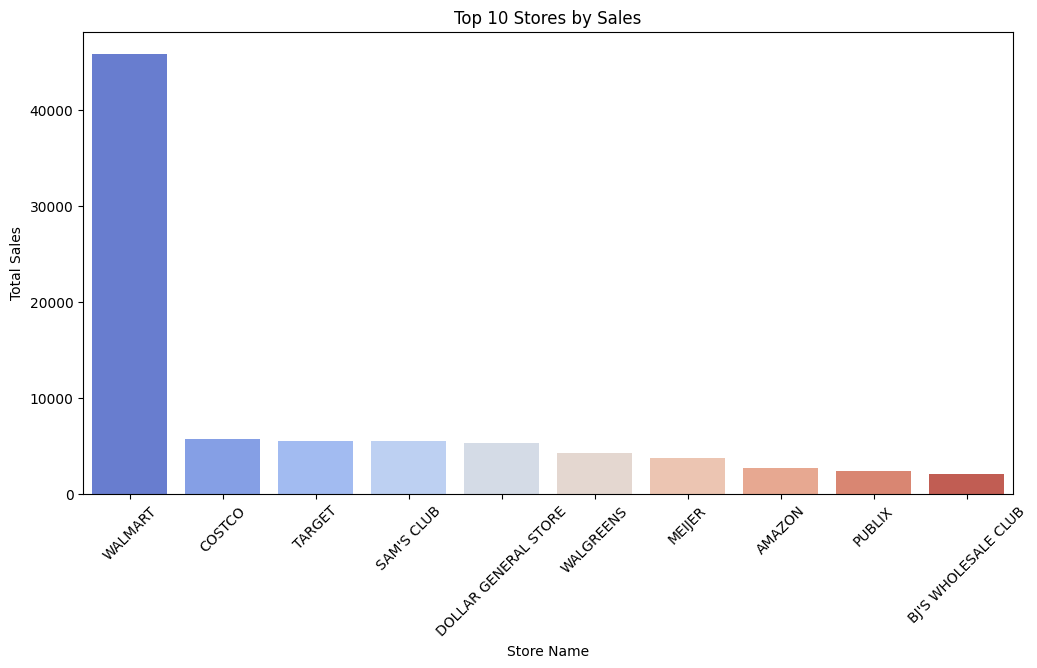

In [78]:
# barplot for store names
def plot_sales_by_store(df):
    store_sales = df.groupby('STORE_NAME')['true_FINAL_SALE'].sum().sort_values(ascending=False).head(10)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=store_sales.index, y=store_sales.values, palette='coolwarm')
    plt.title('Top 10 Stores by Sales')
    plt.xlabel('Store Name')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=45)
    plt.show()

plot_sales_by_store(tran_final)

▲ Walmart has the highest total sales value. However, since we know that many transactions contain values like 'zero' or blank spaces, we can consider Walmart's system to have inconsistencies or data quality issues.

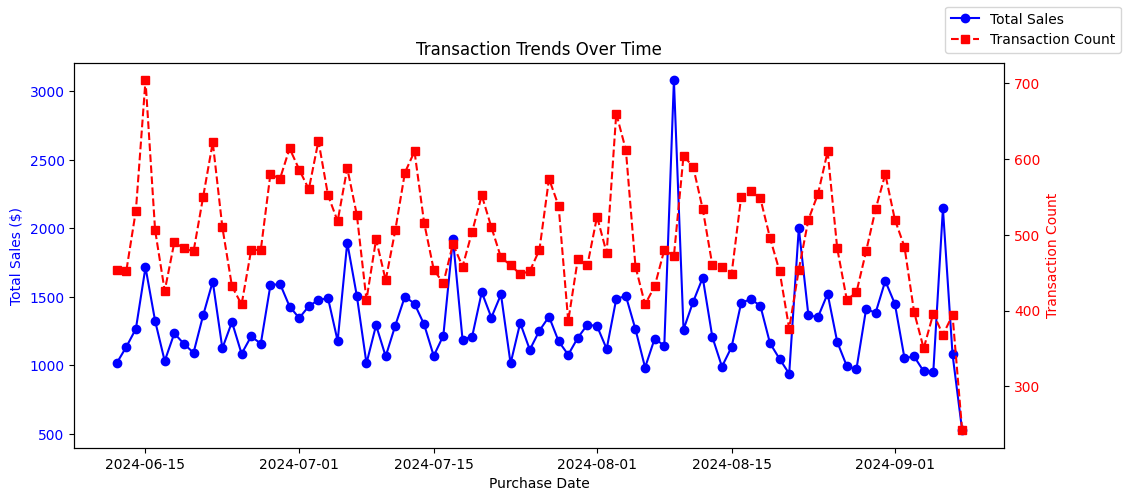

In [80]:
# query to fetch transaction data aggregated by purchase date
query = """
SELECT DATE(t.PURCHASE_DATE) AS purchase_date,
       SUM(CAST(t.true_FINAL_SALE AS FLOAT)) AS total_sales,
       COUNT(*) AS transaction_count
FROM TRANSACTION_TAKEHOME t
WHERE t.PURCHASE_DATE IS NOT NULL
GROUP BY purchase_date
ORDER BY purchase_date;
"""
result = pd.read_sql(query, conn)

# convert datetime format
result["purchase_date"] = pd.to_datetime(result["purchase_date"])

# plot
fig, ax1 = plt.subplots(figsize=(12, 5))

# plot total sales
ax1.plot(result["purchase_date"], result["total_sales"], marker='o', linestyle='-', color='b', label="Total Sales")
ax1.set_xlabel("Purchase Date")
ax1.set_ylabel("Total Sales ($)", color='b')
ax1.tick_params(axis='y', labelcolor='b')

# second y-axis for transaction count
ax2 = ax1.twinx()
ax2.plot(result["purchase_date"], result["transaction_count"], marker='s', linestyle='--', color='r', label="Transaction Count")
ax2.set_ylabel("Transaction Count", color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title("Transaction Trends Over Time")
fig.legend()

plt.show()

▲ Even though I've replaced blank spaces and zeros with 0, the spiky pattern in the plot still suggests possible batch processing, data entry errors, or store-specific reporting issues.

# **Fields That Are Challenging to Understand**

**Upon reviewing the dataset, we observed instances where the same RECEIPT_ID and BARCODE exhibit variations in either FINAL_QUANTITY, FINAL_SALE, or both. The root causes of these discrepancies are not explicitly clear, but we can hypothesize several potential explanations:**


- **Scanning Inconsistencies** – It is possible that variations arise due to errors during the scanning process. For instance, if a barcode is not scanned properly, the system may misinterpret the data, leading to discrepancies in quantity or pricing.

- **System Parsing or Data Fetching Errors** – The inconsistencies may stem from the internal parsing mechanisms used to retrieve transaction data. If the system incorrectly processes the input, it could result in duplicate or altered records for the same item within a receipt.

- **Bulk Pricing, Multi-Pack Purchases, or Buy 1 Get 1 Free** – In some cases, differences in FINAL_QUANTITY and FINAL_SALE may be due to retail pricing models. Retailers often offer discounts which could lead to variations when the same item is recorded multiple times within a transaction.

Given these possibilities, we cannot definitively determine the exact cause of each discrepancy. However, we can establish reasonable assumptions based on observed patterns and extract specific examples to support our hypotheses.

## **Recommendation**
- Transaction: Before we receive explanation about inconsistencies in the final quantity and final sale,

1. Remove the ones without BARCODE
2. Change FINAL_QUANTITY "zero" to 0; change FINAL_SALE blank space to 0
3. Removing questionable records
4. Treating duplicates as multiple entries
5. For convenience, after replacing 'zero' and blank space to 0, sum up the final quantity and final sales for further analysis

- Products: Remove the duplicates


# 2. SQL queries

**Closed-ended questions:**

1. What are the top 5 brands by receipts scanned among users 21 and over?
2. What are the top 5 brands by sales among users that have had their account for at least six months?
3. What is the percentage of sales in the Health & Wellness category by generation?

**Open-ended questions: for these, make assumptions and clearly state them when answering the question.**

1. Who are Fetch’s power users?
2. Which is the leading brand in the Dips & Salsa category?
3. At what percent has Fetch grown year over year?

In [42]:
# Preprocess based on the recommendation

# step 1: remove null values in BARCODE
tran_cleaned = tran_df.copy().dropna(subset=['BARCODE'])

In [43]:
# step 2: change 'zero' and blank spce to 0 for better calculation
tran_cleaned['FINAL_QUANTITY'] = tran_cleaned['FINAL_QUANTITY'].replace('zero', 0)
tran_cleaned['FINAL_SALE'] = tran_cleaned['FINAL_SALE'].replace(' ', 0)

In [44]:
# step 3: Identify outliers
outliers = receipt_barcode_counts[receipt_barcode_counts['FINAL_QUANTITY'] >= 3]
outliers

,RECEIPT_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
8356,61dc6179-7ae7-4acd-b043-8ba796bc5949,4.900006e+10,3,2
15608,b5cee7c6-838f-4208-9866-24d56771cbf9,7.096900e+10,3,3


In [45]:
# step 4: merge the outliers with the cleaned `tran_cleaned`
df_outliers = tran_cleaned.merge(outliers, on=['RECEIPT_ID', 'BARCODE'], how='inner')
df_outliers

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY_x,FINAL_SALE_x,FINAL_QUANTITY_y,FINAL_SALE_y
0,61dc6179-7ae7-4acd-b043-8ba796bc5949,2024-09-08,2024-09-08 13:30:53.944 Z,WALMART,63379ef227ef842ac62b6e42,4.900006e+10,1.00,0,3,2
1,61dc6179-7ae7-4acd-b043-8ba796bc5949,2024-09-08,2024-09-08 13:30:53.944 Z,WALMART,63379ef227ef842ac62b6e42,4.900006e+10,0,0.94,3,2
2,61dc6179-7ae7-4acd-b043-8ba796bc5949,2024-09-08,2024-09-08 13:30:53.944 Z,WALMART,63379ef227ef842ac62b6e42,4.900006e+10,1.00,0,3,2
3,61dc6179-7ae7-4acd-b043-8ba796bc5949,2024-09-08,2024-09-08 13:30:53.944 Z,WALMART,63379ef227ef842ac62b6e42,4.900006e+10,0,0.94,3,2
4,b5cee7c6-838f-4208-9866-24d56771cbf9,2024-09-08,2024-09-08 12:41:29.264 Z,PRICE CUTTER,5efdff6515d4c51485711d44,7.096900e+10,1.00,0,3,3
5,b5cee7c6-838f-4208-9866-24d56771cbf9,2024-09-08,2024-09-08 12:41:29.264 Z,PRICE CUTTER,5efdff6515d4c51485711d44,7.096900e+10,0,5.27,3,3
6,b5cee7c6-838f-4208-9866-24d56771cbf9,2024-09-08,2024-09-08 12:41:29.264 Z,PRICE CUTTER,5efdff6515d4c51485711d44,7.096900e+10,1.07,5.27,3,3
7,b5cee7c6-838f-4208-9866-24d56771cbf9,2024-09-08,2024-09-08 12:41:29.264 Z,PRICE CUTTER,5efdff6515d4c51485711d44,7.096900e+10,1.00,3.19,3,3
8,61dc6179-7ae7-4acd-b043-8ba796bc5949,2024-09-08,2024-09-08 13:30:53.944 Z,WALMART,63379ef227ef842ac62b6e42,4.900006e+10,1.00,0.94,3,2
9,61dc6179-7ae7-4acd-b043-8ba796bc5949,2024-09-08,2024-09-08 13:30:53.944 Z,WALMART,63379ef227ef842ac62b6e42,4.900006e+10,1.00,0.94,3,2


In [46]:
# step 5: remove outliers from the cleaned data
tran_final = tran_cleaned[~tran_cleaned.set_index(['RECEIPT_ID', 'BARCODE']).index.isin(df_outliers.set_index(['RECEIPT_ID', 'BARCODE']).index)]
tran_final

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,0
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,0
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,0,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,0
5,0002d8cd-1701-4cdd-a524-b70402e2dbc0,2024-06-24,2024-06-24 19:44:54.247 Z,WALMART,5dcc6c510040a012b8e76924,6.811314e+11,0,1.46
...,...,...,...,...,...,...,...,...
49995,b5cd61a9-8033-4913-a5c4-fb3f65e3a321,2024-08-21,2024-08-31 14:13:08.634 Z,TARGET,6154bcf098f885648de2f299,8.523911e+10,2.00,1.18
49996,e1b2f634-c9ad-4152-b662-4b22efc25862,2024-08-11,2024-08-11 18:15:56.736 Z,STOP & SHOP,60aa809f188b926b2244c974,4.610040e+10,1.00,2.00
49997,b07ef8dd-e444-40a2-819b-f74a3e5f1ae7,2024-07-11,2024-07-11 08:03:25.816 Z,WALMART,60bd26e83dc3b13a15c5f4e7,6.466300e+11,1.00,20.96
49998,42475141-bef4-4df2-aa37-72577e2512bb,2024-06-18,2024-06-18 19:57:32.211 Z,MARKET BASKET,6169912fac47744405af62b7,4.180050e+10,1.00,3.00


In [47]:
# create a true total sales value, preventing being affected from 0 quantities

# change data type to float
tran_final['FINAL_QUANTITY'] = tran_final['FINAL_QUANTITY'].astype(float)
tran_final['FINAL_SALE'] = tran_final['FINAL_SALE'].astype(float)

tran_final['true_FINAL_SALE'] = tran_final['FINAL_QUANTITY'] * tran_final['FINAL_SALE']
tran_final

<ipython-input-47-3d01c8c46b16>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tran_final['FINAL_QUANTITY'] = tran_final['FINAL_QUANTITY'].astype(float)
<ipython-input-47-3d01c8c46b16>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tran_final['FINAL_SALE'] = tran_final['FINAL_SALE'].astype(float)
<ipython-input-47-3d01c8c46b16>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE,true_FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.0,0.00,0.00
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.0,0.00,0.00
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,0.0,3.49,0.00
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.0,0.00,0.00
5,0002d8cd-1701-4cdd-a524-b70402e2dbc0,2024-06-24,2024-06-24 19:44:54.247 Z,WALMART,5dcc6c510040a012b8e76924,6.811314e+11,0.0,1.46,0.00
...,...,...,...,...,...,...,...,...,...
49995,b5cd61a9-8033-4913-a5c4-fb3f65e3a321,2024-08-21,2024-08-31 14:13:08.634 Z,TARGET,6154bcf098f885648de2f299,8.523911e+10,2.0,1.18,2.36
49996,e1b2f634-c9ad-4152-b662-4b22efc25862,2024-08-11,2024-08-11 18:15:56.736 Z,STOP & SHOP,60aa809f188b926b2244c974,4.610040e+10,1.0,2.00,2.00
49997,b07ef8dd-e444-40a2-819b-f74a3e5f1ae7,2024-07-11,2024-07-11 08:03:25.816 Z,WALMART,60bd26e83dc3b13a15c5f4e7,6.466300e+11,1.0,20.96,20.96
49998,42475141-bef4-4df2-aa37-72577e2512bb,2024-06-18,2024-06-18 19:57:32.211 Z,MARKET BASKET,6169912fac47744405af62b7,4.180050e+10,1.0,3.00,3.00


In [48]:
# drop duplicates in products_df
products_df = products_df.drop_duplicates()

Assumption:
1. TOTAL_SALES is unit price
2. Outliers are removed
3. Data is cleaned (dupicates, null values)

In [49]:
import sqlite3

# create an in-memory SQLite database
conn = sqlite3.connect(":memory:")  # Uses a temporary in-memory database


In [50]:
# load the dataframes into SQLite databases as tables
products_df.to_sql("PRODUCTS_TAKEHOME", conn, if_exists="replace", index=False)
tran_final.to_sql("TRANSACTION_TAKEHOME", conn, if_exists="replace", index=False)
user_df.to_sql("USER_TAKEHOME", conn, if_exists="replace", index=False)


100000

## Close-ended Questions

▼ Assuming there are no null values in the data

In [51]:
# 1. What are the top 5 brands by receipts scanned among users 21 and over?

query_1 = """
SELECT p.BRAND, COUNT(t.RECEIPT_ID) AS receipt_count
FROM TRANSACTION_TAKEHOME t
JOIN USER_TAKEHOME u ON t.USER_ID = u.ID
JOIN PRODUCTS_TAKEHOME p ON t.BARCODE = p.BARCODE
WHERE u.BIRTH_DATE <= DATE('2025-02-19', '-21 years')  -- Users 21 and older
AND p.BRAND IS NOT NULL
GROUP BY p.BRAND
ORDER BY receipt_count DESC
LIMIT 5;
"""
result_1 = pd.read_sql(query_1, conn)
result_1

,BRAND,receipt_count
0,NERDS CANDY,6
1,DOVE,6
2,TRIDENT,4
3,SOUR PATCH KIDS,4
4,MEIJER,4


In [52]:
# 2. What are the top 5 brands by sales among users that have had their account for at least six months?

query_2 = """
SELECT p.BRAND, SUM(CAST(t.true_FINAL_SALE AS FLOAT)) AS total_sales
FROM TRANSACTION_TAKEHOME t
JOIN USER_TAKEHOME u ON t.USER_ID = u.ID
JOIN PRODUCTS_TAKEHOME p ON t.BARCODE = p.BARCODE
WHERE u.CREATED_DATE <= DATE('2025-02-19', '-6 months')  -- Users with at least six months tenure
AND p.BRAND IS NOT NULL
GROUP BY p.BRAND
ORDER BY total_sales DESC
LIMIT 5;
"""
result_2 = pd.read_sql(query_2, conn)
result_2

,BRAND,total_sales
0,CVS,72.00
1,DOVE,30.91
2,TRESEMMÉ,29.16
3,TRIDENT,23.36
4,COORS LIGHT,17.48


In [53]:
# 3. What is the percentage of sales in the Health & Wellness category by generation?

query_3 = """
SELECT
    CASE
        WHEN DATE('2025-03-03', '-25 years') <= u.BIRTH_DATE THEN 'Gen Z'
        WHEN DATE('2025-03-03', '-40 years') <= u.BIRTH_DATE THEN 'Millennials'
        WHEN DATE('2025-03-03', '-55 years') <= u.BIRTH_DATE THEN 'Gen X'
        ELSE 'Boomers'
    END AS generation,
    SUM(t.true_FINAL_SALE) AS total_health_sales,
    (SUM(t.true_FINAL_SALE) * 100.0 ) / (SELECT SUM(true_FINAL_SALE) FROM TRANSACTION_TAKEHOME) AS percentage_of_total
FROM TRANSACTION_TAKEHOME t
JOIN USER_TAKEHOME u ON t.USER_ID = u.ID
JOIN PRODUCTS_TAKEHOME p ON t.BARCODE = p.BARCODE
WHERE p.CATEGORY_1 = 'Health & Wellness'
GROUP BY generation;
"""
result_3 = pd.read_sql(query_3, conn)
result_3

,generation,total_health_sales,percentage_of_total
0,Boomers,93.13,0.079715
1,Gen X,60.78,0.052025
2,Millennials,20.21,0.017299


In [74]:
query = """
SELECT COUNT(*)
FROM TRANSACTION_TAKEHOME t
JOIN USER_TAKEHOME u ON t.USER_ID = u.ID
JOIN PRODUCTS_TAKEHOME p ON t.BARCODE = p.BARCODE
WHERE u.BIRTH_DATE >= DATE('2000-03-03')
AND p.CATEGORY_1 = 'Health & Wellness';
"""
result = pd.read_sql(query, conn)
result

,COUNT(*)
0,0


▲ The reason why the above table doesn't show Gen Z users is because they have not purchased anything in that category.

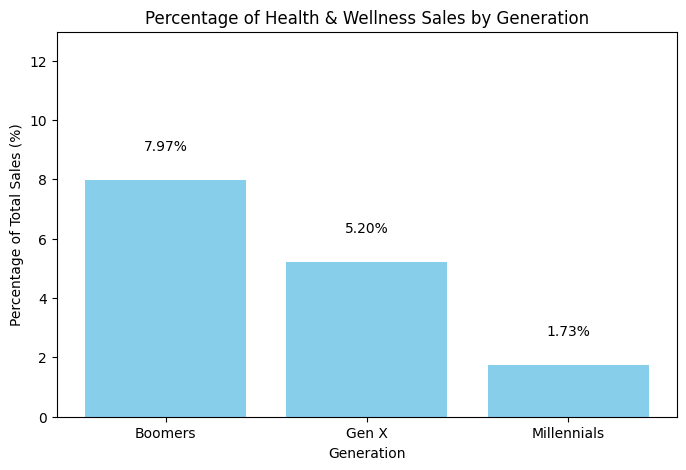

In [75]:
# convert the SQL query result to a DataFrame
df = result_3.copy()

# sort by generation for better visualization
df = df.sort_values(by="percentage_of_total", ascending=False)

# plot
plt.figure(figsize=(8, 5))
plt.bar(df["generation"], df["percentage_of_total"] * 100, color='skyblue')


plt.xlabel("Generation")
plt.ylabel("Percentage of Total Sales (%)")
plt.title("Percentage of Health & Wellness Sales by Generation")
plt.ylim(0, df["percentage_of_total"].max() * 100 + 5)

# display values
for i, val in enumerate(df["percentage_of_total"] * 100):
    plt.text(i, val + 1, f"{val:.2f}%", ha='center')

plt.show()


## Open-ended questions

**Assumption:**

**Power users** are defined as those with the **highest number of scanned receipts** This assumes repeat engagement indicates brand loyalty and high customer lifetime value.

In [54]:
# 1. Who are Fetch’s power users?

query_4 = """
SELECT t.USER_ID, COUNT(t.RECEIPT_ID) AS receipt_count
FROM TRANSACTION_TAKEHOME t
GROUP BY t.USER_ID
ORDER BY receipt_count DESC
LIMIT 10;
"""
result_4 = pd.read_sql(query_4, conn)
result_4


,USER_ID,receipt_count
0,62925c1be942f00613f7365e,20
1,64063c8880552327897186a5,18
2,6327a07aca87b39d76e03864,14
3,61d5f5d2c4525a3a478b386b,14
4,60a5363facc00d347abadc8e,14
5,609af341659cf474018831fb,14
6,6682cbf6465f309038ae1888,12
7,66651af0e04f743a096e3bf9,12
8,653a0f40909604bae9071473,12
9,63f1904938f010745b9a2b60,12


From the `USER_ID`, we can trace back the users in the User dataset. Let's see if we can identify some trends.

In [55]:
# join USER_ID with ID in Users dataset
merged_df = user_df.merge(result_4, left_on='ID', right_on='USER_ID', how='inner')
merged_df

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER,USER_ID,receipt_count


From the above result, this indicates that the **power users are not logged into the Users database!** This could be a significant issue, as missing their data may result in lost opportunities for post-service feedback and targeted marketing efforts. I recommend further investigation to address this gap.

In [56]:
# 2. Which is the leading brand in the Dips & Salsa category?

query_5 = """
SELECT p.BRAND, SUM(CAST(t.true_FINAL_SALE AS FLOAT)) AS total_sales
FROM TRANSACTION_TAKEHOME t
JOIN PRODUCTS_TAKEHOME p ON t.BARCODE = p.BARCODE
WHERE p.CATEGORY_2 = 'Dips & Salsa'
GROUP BY p.BRAND
ORDER BY total_sales DESC
LIMIT 1;
"""
result_5 = pd.read_sql(query_5, conn)
result_5

,BRAND,total_sales
0,TOSTITOS,197.24


**Assumptions:**

Growth is measured by **the number of users who joined each year** (CREATED_DATE in USER_TAKEHOME).

The growth rate is calculated as:
**Growth Rate =(Users in Current Year − Users in Previous Year) / Users in Previous Year × 100**

This assumes CREATED_DATE follows a standard timestamp format.

In [57]:
# 3. At what percent has Fetch grown year over year?

query_6 = """
WITH UserYearly AS (
    SELECT
        CAST(strftime('%Y', CREATED_DATE) AS INTEGER) AS Year,
        COUNT(ID) AS NewUsers
    FROM USER_TAKEHOME
    WHERE CREATED_DATE IS NOT NULL
    GROUP BY Year
)
SELECT
    U1.Year AS Current_Year,
    U1.NewUsers AS Users_This_Year,
    U2.NewUsers AS Users_Last_Year,
    ROUND(((U1.NewUsers - U2.NewUsers) * 100.0 / NULLIF(U2.NewUsers, 0)), 2) AS YoY_Growth_Percentage
FROM UserYearly U1
LEFT JOIN UserYearly U2
    ON U1.Year = U2.Year + 1  -- Ensure correct year pairing
ORDER BY U1.Year DESC;
"""
result_6 = pd.read_sql(query_6, conn)
result_6

,Current_Year,Users_This_Year,Users_Last_Year,YoY_Growth_Percentage
0,2024,11631,15464.0,-24.79
1,2023,15464,26807.0,-42.31
2,2022,26807,19159.0,39.92
3,2021,19159,16883.0,13.48
4,2020,16883,7093.0,138.02
5,2019,7093,2168.0,227.17
6,2018,2168,644.0,236.65
7,2017,644,70.0,820.00
8,2016,70,51.0,37.25
9,2015,51,30.0,70.00


from matplotlib import pyplot as plt
result_6['Current_Year'].plot(kind='hist', bins=20, title='Current_Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
result_6['Users_This_Year'].plot(kind='hist', bins=20, title='Users_This_Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
result_6['Users_Last_Year'].plot(kind='hist', bins=20, title='Users_Last_Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
result_6['YoY_Growth_Percentage'].plot(kind='hist', bins=20, title='YoY_Growth_Percentage')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
result_6.plot(kind='scatter', x='Current_Year', y='Users_This_Year', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
result_6.plot(kind='scatter', x='Users_This_Year', y='Users_Last_Year', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
result_6.plot(kind='scatter', x='Users_Last_Year', y='YoY_Growth_Percentage', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
result_6['Current_Year'].plot(kind='line', figsize=(8, 4), title='Current_Year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
result_6['Users_This_Year'].plot(kind='line', figsize=(8, 4), title='Users_This_Year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
result_6['Users_Last_Year'].plot(kind='line', figsize=(8, 4), title='Users_Last_Year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
result_6['YoY_Growth_Percentage'].plot(kind='line', figsize=(8, 4), title='YoY_Growth_Percentage')
plt.gca().spines[['top', 'right']].set_visible(False)

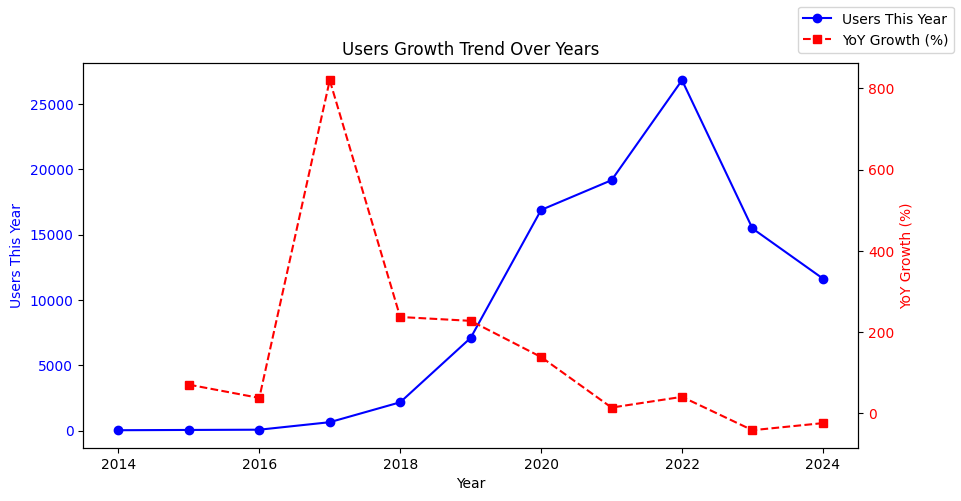

In [70]:
# convert SQL query to a DataFrame
df = result_6.copy()
# sort by Current_Year in ascending order for proper plotting
df = df.sort_values(by="Current_Year", ascending=True)

# plot
fig, ax1 = plt.subplots(figsize=(10, 5))

# Users_This_Year
ax1.plot(df["Current_Year"], df["Users_This_Year"], marker='o', linestyle='-', color='b', label='Users This Year')
ax1.set_xlabel('Year')
ax1.set_ylabel('Users This Year', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# second y-axis for YoY Growth Percentage
ax2 = ax1.twinx()
ax2.plot(df["Current_Year"], df["YoY_Growth_Percentage"], marker='s', linestyle='--', color='r', label='YoY Growth (%)')
ax2.set_ylabel('YoY Growth (%)', color='r')
ax2.tick_params(axis='y', labelcolor='r')


plt.title('Users Growth Trend Over Years')
fig.legend()

plt.show()